# IT'S TIME TO GENERATE NEW CARS IMAGES

### Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Imports

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

### Configs

In [4]:
CHECKPOINT_DIR = '/content/drive/My Drive/lecture hands on lab/vanilla_gan_DCGAN/inference_checkpoint'
LR = 1e-4
LATENT_DEPTH = 100

## Loading Checkpoint

![Inference.png](https://drive.google.com/uc?export=view&id=12JP9twsCjRrOuWBL_uws4Wt0ySUK8EsF)

Measure the GAN performance by:

* Images Quality
* Images Diversity

In [12]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(25*25*128, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Reshape((25, 25, 128)))
    assert model.output_shape == (None, 25, 25, 128) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 25, 25, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 50, 50, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid'))
    assert model.output_shape == (None, 100, 100, 3)
    model.summary()
    return model

In [13]:
generator = make_generator_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80000)             8000000   
_________________________________________________________________
batch_normalization_3 (Batch (None, 80000)             320000    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 80000)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 25, 25, 128)       409600    
_________________________________________________________________
batch_normalization_4 (Batch (None, 25, 25, 128)       512       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 25, 25, 128)      

In [14]:
generator_optimizer = tf.keras.optimizers.Adam(lr=LR)

In [15]:
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer, generator=generator)

In [16]:
checkpoint.restore(tf.train.latest_checkpoint(CHECKPOINT_DIR))


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f1863145438> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f1865c213c8>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f1865c213c8> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7f18631790f0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2DTranspose object at 0x7f1863104eb8> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f186310a4e0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f186310a4e0> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7f1863118438>).

Two checkpoint references resolved to diff

## Inference

After using the inference method we can tell if there is model collapse or no

In [29]:
def generate_and_save_images(model, LATENT_DEPTH):
    
    plt.figure(figsize=(15,10))
    for i in range(4):
        # tf.random.normal will make the image generation random and change each time the inference
        input_ = tf.random.normal([1, LATENT_DEPTH])
        images = model(input_, training=False)

        image = images[0, :, :, :]
        image = np.reshape(image, [100, 100, 3])

        plt.subplot(1, 4, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title("Randomly Generated Images")

    plt.tight_layout()  
    plt.savefig('Generated Images')
    plt.show()

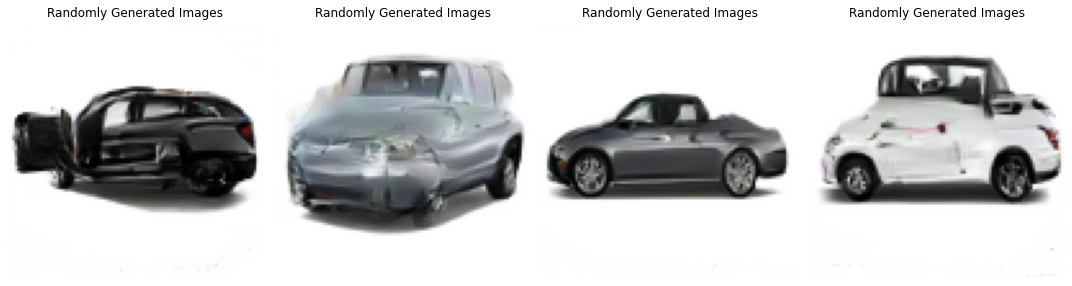

In [41]:
generate_and_save_images(generator, LATENT_DEPTH)